 # Univariate linear regression

# Introduction

In the following study, we will fit a univariate linear regression model using one of the provided features to predict a given target variable (Mean per capita (100,000) cancer mortalities) as closely as possible.

## Used libraries 

In [1]:
#working with data
import pandas as pd
import numpy as np


#plotting data
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading Data from a CSV File

In [3]:
df_test = pd.read_csv('cancer_us_county-testing.csv')

In [4]:
df_test

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.000000,154,159.5,479.800000,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,...,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.000000,140,167.2,438.500000,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,...,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.000000,18,131.6,410.800000,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,...,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.000000,46,189.4,403.800000,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.000000,1065,168.9,432.100000,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,...,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746
607,1962.667684,31,174.2,453.549422,50905,14219,9.3,0.000000,"(48021.6, 51046.4]",39.1,...,52.1,33.9,17.6,93.756201,1.658398,0.836286,0.290574,45.219595,5.893846,1822


In [5]:
df_train = pd.read_csv('cancer_us_county-training.csv')

In [6]:
df_train

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
2436,1962.667684,23,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045


## Case of study and data understanding 

Hypothesis

Analysing the 34 features given to predict the death rate, The case study has the following hypothesis: cancer diagnosis, cancer mortality, and cancer-related clinical trials (with more cancer death, more studies are conducted) should be more connected to the pathers on the mean per capita cancer mortality rate. 

## Explore the dataset

In [7]:
df_train.describe().round(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,...,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00
mean,587.17,180.59,178.85,448.31,47028.43,98515.79,16.85,166.02,45.31,39.64,...,41.24,36.28,19.23,83.78,9.04,1.23,1.95,51.22,5.63,1523.79
std,1236.45,438.47,27.54,53.25,11919.39,274527.19,6.39,563.81,45.05,5.22,...,9.37,7.82,6.09,16.28,14.36,2.56,3.54,6.50,1.97,874.91
min,6.00,3.00,66.30,201.30,22640.00,827.00,3.20,0.00,22.30,22.40,...,13.50,11.20,2.60,10.20,0.00,0.00,0.00,22.99,0.00,0.00
25%,76.00,28.00,161.40,420.30,38872.75,11545.75,12.10,0.00,37.80,36.40,...,34.60,30.92,15.00,77.34,0.63,0.25,0.29,47.83,4.52,775.25
50%,172.50,62.00,178.10,453.55,45186.50,26942.50,15.90,0.00,41.00,39.60,...,41.30,36.40,18.80,90.12,2.30,0.55,0.80,51.66,5.37,1512.50
75%,521.50,151.00,195.30,481.98,52492.50,69524.50,20.40,92.56,44.08,42.50,...,47.60,41.50,23.10,95.46,10.45,1.21,2.11,55.33,6.46,2279.75
max,24965.00,9445.00,293.90,1014.20,125635.00,5238216.00,47.40,9762.31,624.00,64.70,...,70.70,65.10,46.60,100.00,84.87,42.62,41.93,78.08,18.56,3046.00


In [8]:
#Print general information about a DataFrame 
df_train.info()

#it shows the features and its data type,and Null count
#PctSomeCol18_24 and PctPrivateCoverageAlone and PctEmployed16_Over  ... have missing values
# these columns are not a good option to train the model, because we can miss data dropping rows with no value related on these columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

## data cleaning

1. Outliers

After analysing the distribution of the variables, some extreme values were discovered. Since we don't have extra information to confirm if we encounter errors in the data, and considering that changing the value for the mean or other aggregation could lead to wrong learning patterns from the model, the decision is to drop the rows with outliers on the variable that is going to predict the target (mean cancer mortalities).
Additionally, the amount of data we will lose doesn't represent a high proportion of the data.

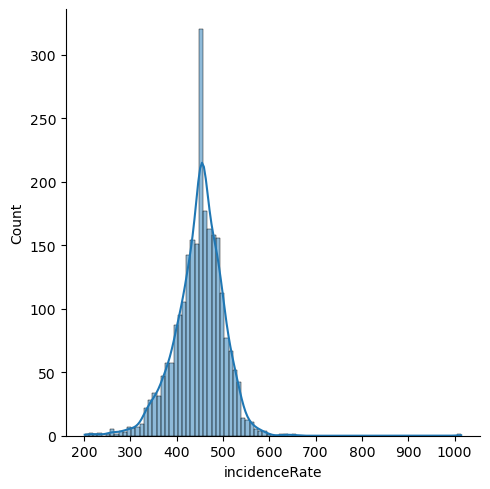

In [9]:
# the variable
sns.displot(df_train["incidenceRate"], kde=True)

In [10]:
df_train[df_train["incidenceRate"] > 700]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
851,135.0,23,162.1,1014.2,46954,15052,20.1,0.0,"(45201, 48021.6]",24.6,...,52.2,22.0,8.9,74.888166,15.277213,5.889928,0.460892,36.337594,2.181467,1083


In [11]:
 df_train = df_train.drop(df_train[df_train.incidenceRate > 700].index)

In [12]:
# the variable
sns.displot(df_train["avgAnnCount"], kde=True)


In [13]:
df_train[df_train["avgAnnCount"] > 5000]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
124,8895.0,2817,163.8,528.0,85886,1501587,7.7,181.807648,"(61494.5, 125635]",40.6,...,55.7,26.2,12.0,80.948638,7.662320,3.781605,4.950535,57.618624,4.419519,156
274,6894.0,2471,164.3,441.1,58127,1982498,15.2,153.846309,"(54545.6, 61494.5]",34.0,...,47.5,25.1,16.4,70.641872,15.420684,4.963004,5.383735,49.654687,5.979490,353
304,15470.0,5780,146.6,401.4,53929,4167947,17.1,177.545444,"(51046.4, 54545.6]",35.6,...,44.1,31.4,19.8,79.580767,5.221044,3.789014,6.188306,47.036501,5.392191,391
470,10411.0,3927,197.9,528.7,41434,1759335,24.1,470.063973,"(40362.7, 42724.4]",37.8,...,41.0,42.0,26.0,53.342526,39.414346,2.904772,1.728810,37.156645,5.676241,602
473,8236.0,3303,211.7,533.5,39037,1567442,25.8,742.611210,"(37413.8, 40362.7]",33.7,...,38.8,41.3,27.6,41.672154,42.757570,6.864827,5.573247,27.459943,5.282606,606
794,8072.0,2584,145.2,463.9,75459,1644518,17.7,1258.727481,"(61494.5, 125635]",36.6,...,49.9,31.8,19.7,56.426514,15.021108,11.653341,12.381291,26.667902,3.548718,1016
817,14477.0,5108,161.4,433.8,54230,4538028,17.3,391.359419,"(51046.4, 54545.6]",32.8,...,42.8,27.5,19.8,63.121729,18.861747,6.572709,8.734237,46.913495,6.028644,1042
872,5978.0,2528,165.0,430.8,45162,949827,15.2,184.244078,"(42724.4, 45201]",47.1,...,38.5,37.1,20.0,82.642191,10.320491,3.170341,0.998844,40.138531,4.507693,1107
909,7861.0,2722,159.6,473.1,84026,1585139,8.9,49.207041,"(61494.5, 125635]",38.5,...,60.8,27.2,13.9,79.053104,4.882669,10.499603,2.388125,51.208076,4.751206,1146
913,6146.0,2183,183.3,544.1,50134,922578,15.2,121.398950,"(48021.6, 51046.4]",40.4,...,51.7,36.6,19.7,78.654143,13.309476,3.150879,2.151622,41.896742,4.815863,1151


In [14]:
 df_train = df_train.drop(df_train[df_train.avgAnnCount > 5000].index)

In [15]:
df_train

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
2436,1962.667684,23,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045


2. Missing values

The variables the hypothesis is focused on don't have missing values (cancer diagnosis, cancer mortality, and cancer-related clinical trials)

In [16]:
df_train.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1807
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          121
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     495
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

3. transforming variable avgDeathsPerYear and avgAnnCount

standardising the variable to mean number per capita (100.000)

In [17]:
df_train["avgDeathsPerYear"] = (df_train.avgDeathsPerYear/df_train.popEst2015)*100000

standardising the variable to mean number per capita (100.000)

In [18]:
df_train["avgAnnCount"] = (df_train.avgAnnCount/df_train.popEst2015)*100000

In [19]:
df_train

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,659.077292,299.580587,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,333.287677,159.795462,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,596.100847,253.138716,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,65269.959561,232.790156,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,502.865162,233.890773,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,467.553697,188.704191,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,618.752975,253.126217,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,565.902972,230.756552,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
2436,22162.010885,259.710930,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045


We need to standardise the entrances from the test set, as a common pipeline for the predictions.

In [20]:
df_test["avgDeathsPerYear"] = (df_test.avgDeathsPerYear/df_test.popEst2015)*100000
df_test["avgAnnCount"] = (df_test.avgAnnCount/df_test.popEst2015)*100000

## Exploratory Data Analysis (EDA)

1. Correlation - relationship between the features

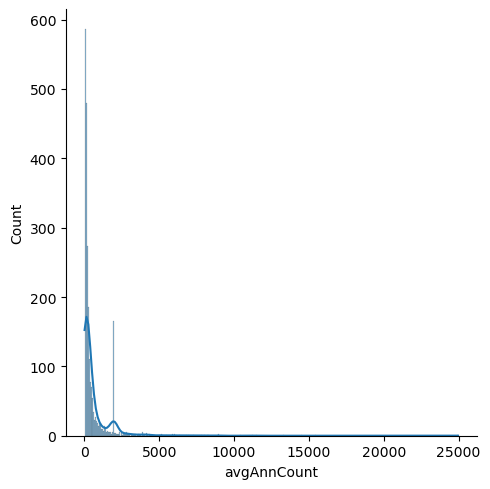

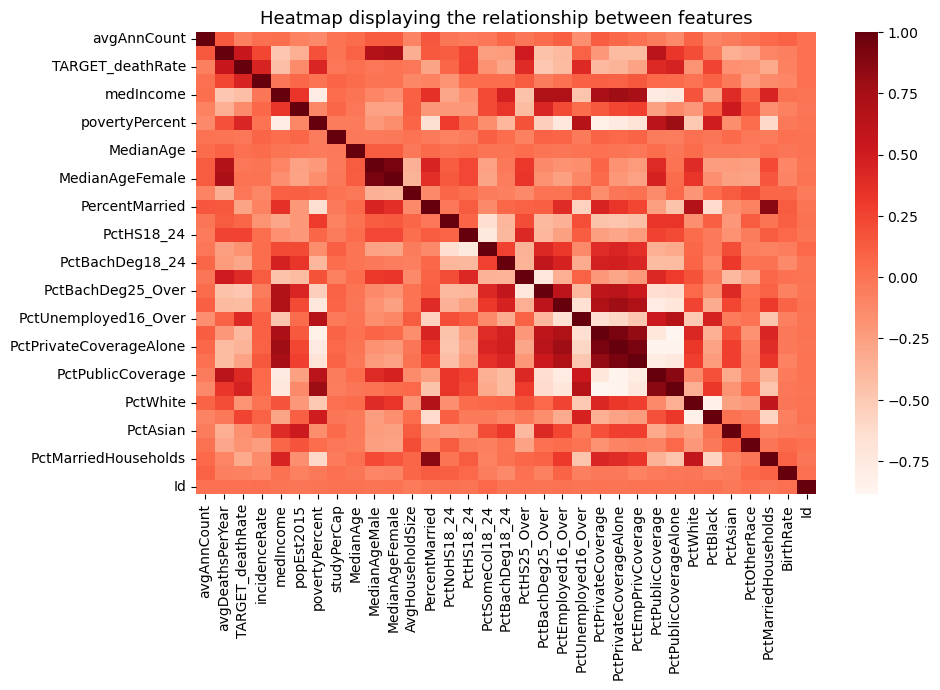

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),cmap=plt.cm.Reds) #,annot=True
plt.title('Heatmap displaying the relationship between features',
         fontsize=13)
plt.show()

In [22]:
df_train.corr()['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
avgDeathsPerYear           0.552975
PctPublicCoverageAlone     0.467996
incidenceRate              0.454557
povertyPercent             0.439743
PctPublicCoverage          0.414454
PctUnemployed16_Over       0.411358
PctHS25_Over               0.396780
PctHS18_24                 0.257774
PctBlack                   0.253480
PctNoHS18_24               0.078898
MedianAge                  0.022947
Id                         0.019980
MedianAgeFemale            0.005188
studyPerCap               -0.019107
AvgHouseholdSize          -0.022320
MedianAgeMale             -0.023036
avgAnnCount               -0.060771
BirthRate                 -0.081463
popEst2015                -0.137863
PctAsian                  -0.169651
PctSomeCol18_24           -0.173717
PctOtherRace              -0.181594
PctWhite                  -0.182023
PctEmpPrivCoverage        -0.272886
PercentMarried            -0.277805
PctBachDeg18_24           -0.290172
PctMarriedHouseholds      -0

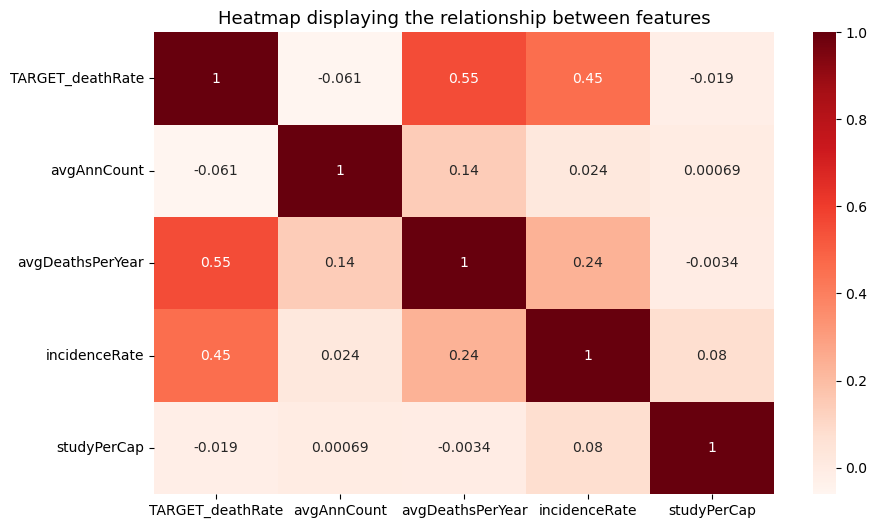

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[["TARGET_deathRate", "avgAnnCount", "avgDeathsPerYear", "incidenceRate", "studyPerCap"]].corr(),cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the relationship between features',
         fontsize=13)
plt.show()

The correlation matrix shows a higher positive correlation with the target and incidence rate. 

Additionally, we have a higher correlation with the avgDeathsPerYear standardised variable.

The present study selects the incidence rate and avgDeathsPerYear, both measures in per capita values, to train and test two univariate regression models that aim to predict the death Rate: Mean per capita (100,000) cancer mortalities.

2. Univariate Analysis

In [24]:
# the target variables
sns.displot(df_train["TARGET_deathRate"], kde=True)

3. Exploring the range and distribution of numerical Variables

In [25]:
fig, ax = plt.subplots(5, 2, figsize = (15, 13))
sns.boxplot(x= df_train["TARGET_deathRate"], ax = ax[0,0])
sns.distplot(df_train['TARGET_deathRate'], ax = ax[0,1])
sns.boxplot(x= df_train["avgAnnCount"], ax = ax[1,0])
sns.distplot(df_train['avgAnnCount'], ax = ax[1,1])
sns.boxplot(x= df_train["avgDeathsPerYear"], ax = ax[2,0])
sns.distplot(df_train['avgDeathsPerYear'], ax = ax[2,1])
sns.boxplot(x= df_train["incidenceRate"], ax = ax[3,0])
sns.distplot(df_train['incidenceRate'], ax = ax[3,1])
sns.boxplot(x= df_train["studyPerCap"], ax = ax[4,0])
sns.distplot(df_train['studyPerCap'], ax = ax[4,1])
plt.tight_layout()

4. How features are related with each other

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train[["TARGET_deathRate", "avgAnnCount", "avgDeathsPerYear", "incidenceRate", "studyPerCap"]]
sns.pairplot(cData_attr, diag_kind='kde')   
#df_train.iloc[:, 0:7]

Expanding the graph vs the target

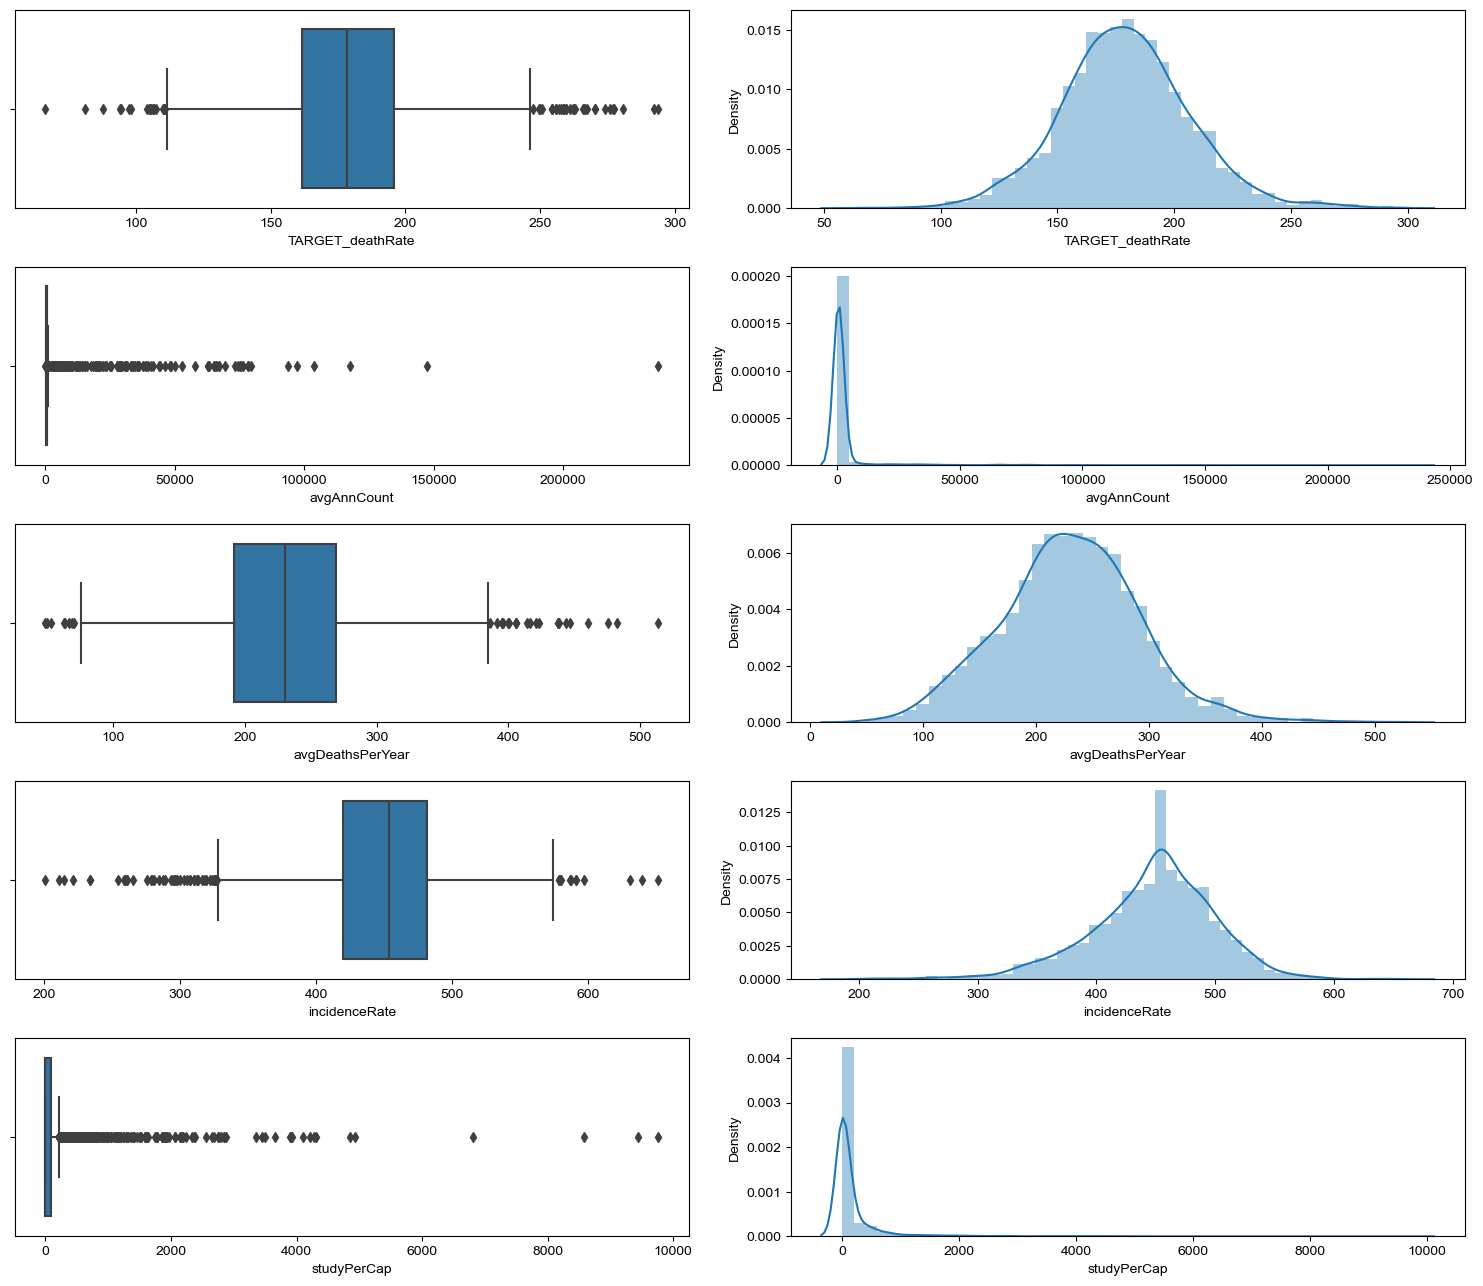

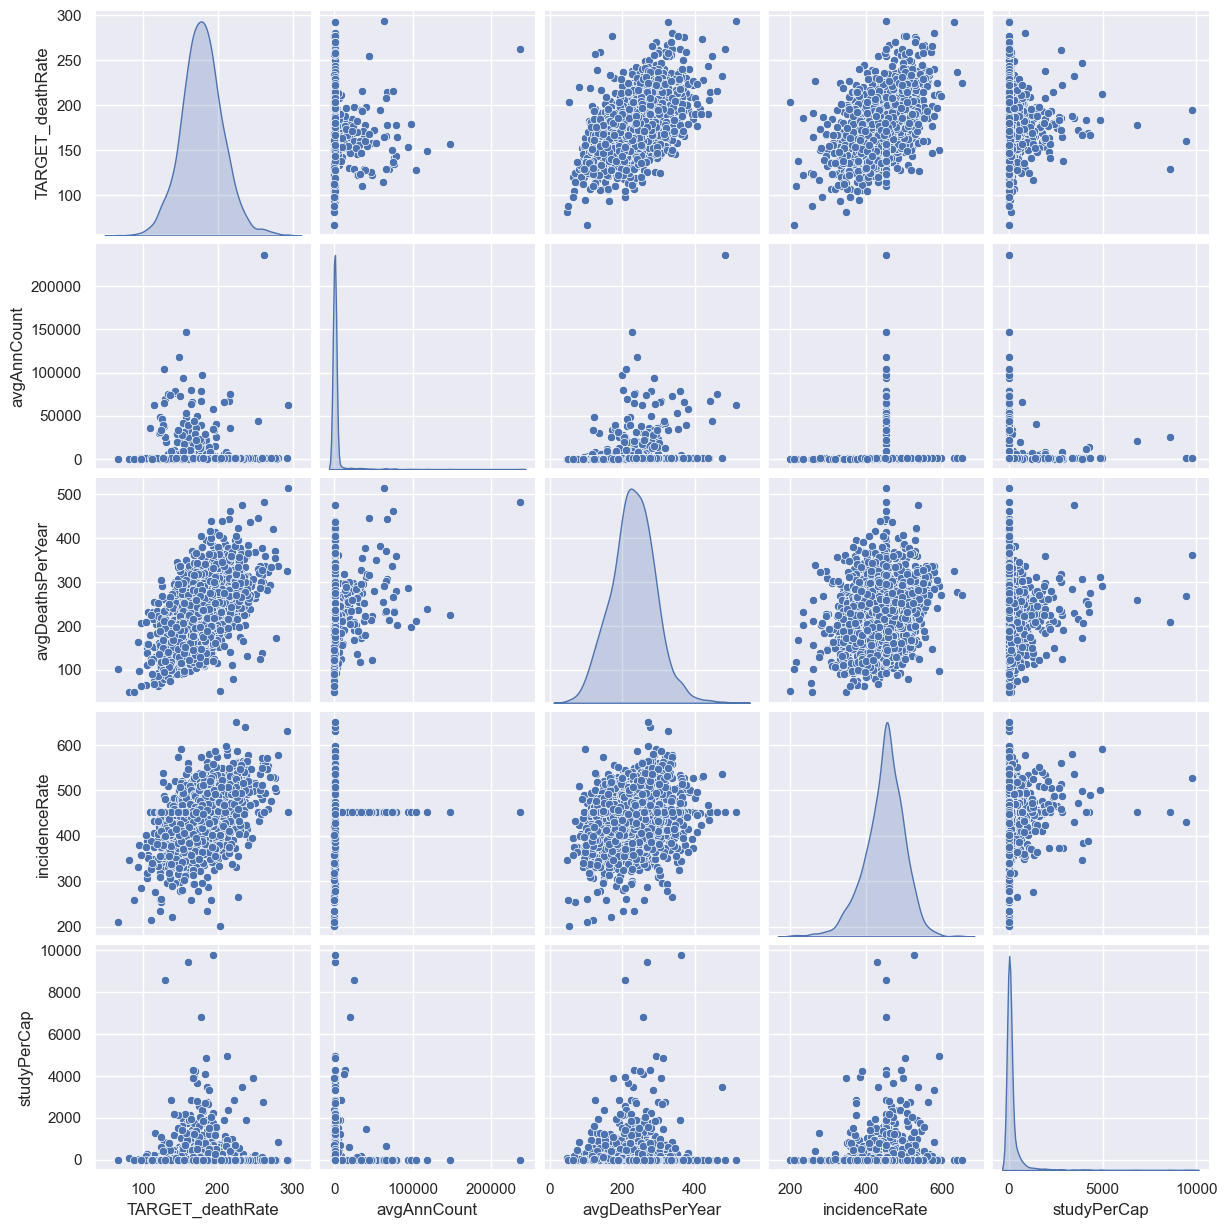

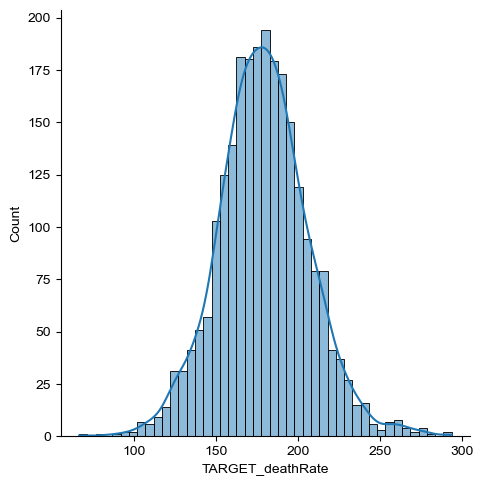

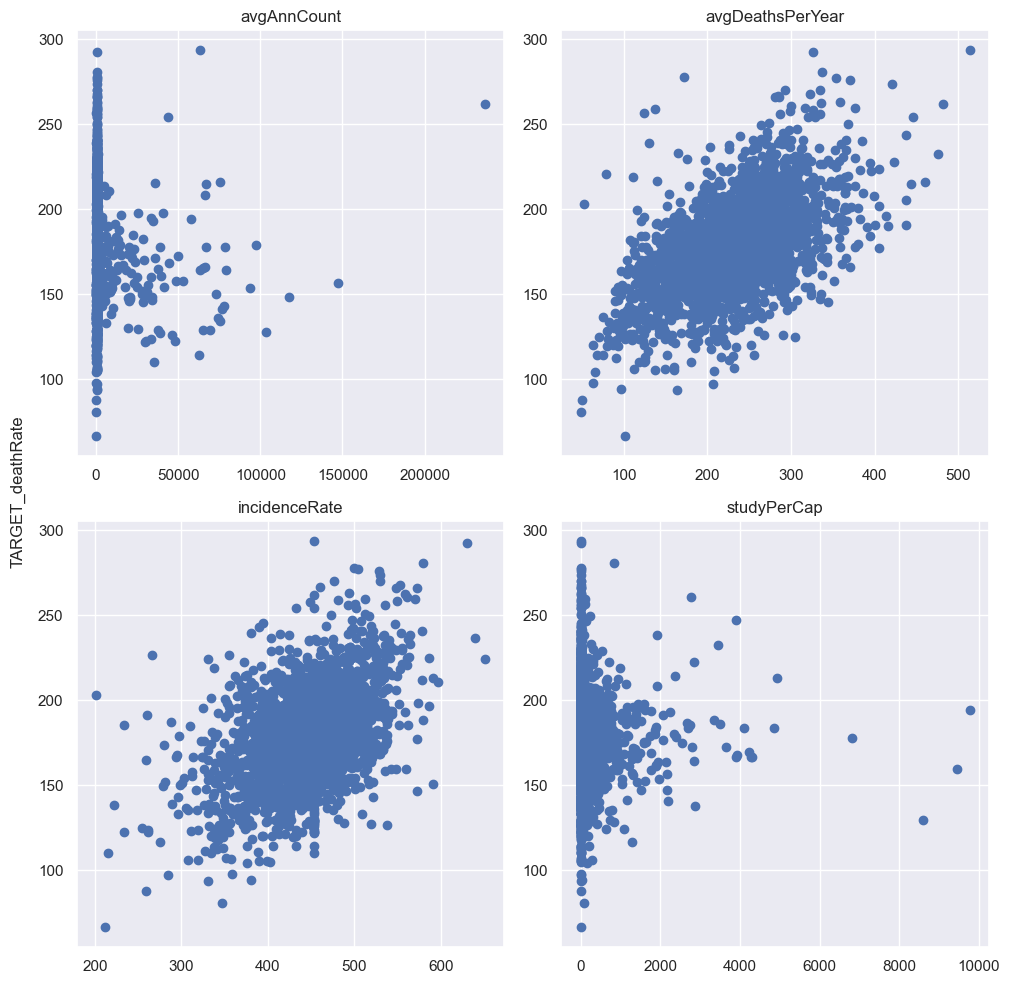

In [27]:
plt.figure(1)
f,axarr = plt.subplots(2,2, figsize=(10,10))
TARGET_deathRate = df_train.TARGET_deathRate.values
axarr[0,0].scatter(df_train.avgAnnCount.values, TARGET_deathRate)
axarr[0,0].set_title('avgAnnCount')
axarr[0,1].scatter(df_train.avgDeathsPerYear.values, TARGET_deathRate)
axarr[0,1].set_title('avgDeathsPerYear')
axarr[1,0].scatter(df_train.incidenceRate.values, TARGET_deathRate)
axarr[1,0].set_title('incidenceRate')
axarr[1,1].scatter(df_train.studyPerCap.values, TARGET_deathRate)
axarr[1,1].set_title('studyPerCap')

f.text(-0.01, 0.5, 'TARGET_deathRate', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

5. Distributions of the variables

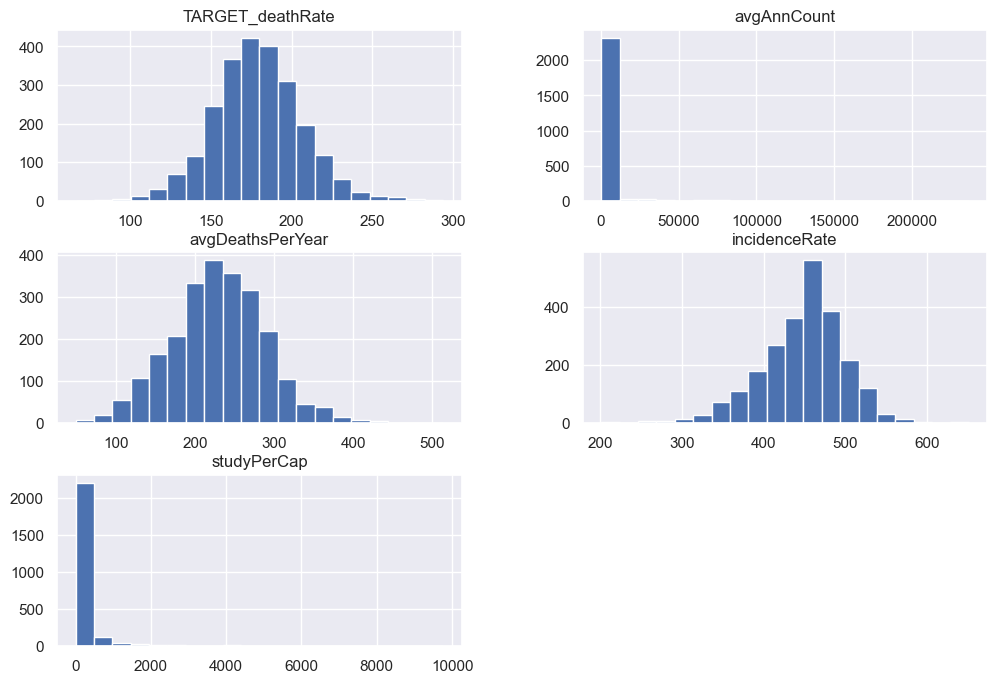

In [28]:
df_train[["TARGET_deathRate", "avgAnnCount", "avgDeathsPerYear", "incidenceRate", "studyPerCap"]].hist(figsize=(12,8),bins=20)
plt.show()

# Experiment 1

## Univariate linear regression using incidence rate

In [29]:
df_train.plot(x='incidenceRate', y='TARGET_deathRate', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='incidenceRate', ylabel='TARGET_deathRate'>

### Split the data 

In [30]:
X = df_train['incidenceRate'].values
y = df_train['TARGET_deathRate'].values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Performance

In [33]:
y_train.shape

(1926,)

In [34]:
 #average value of the target variable

y_mean = y_train.mean()
y_mean

179.24309449636553

In [35]:
y_base = np.full(y_train.shape, y_mean)

In [36]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [37]:
print(mse(y_train, y_base))
print(mae(y_train, y_base))

769.3903027813093
21.40203726887571


In [38]:
#(y_base - y_train).sum()

### Train Univariate Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression 

In [40]:
reg1 = LinearRegression()

In [41]:
reg1.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [42]:
#model's performance
y_train_preds = reg1.predict(X_train.reshape(-1, 1))

In [43]:
# scores on the training set

print(mse(y_train, y_train_preds))
print(mae(y_train, y_train_preds))

609.1833911360386
19.359610564085298


In [44]:
# scores on the validation set

y_valid_preds= reg1.predict(X_valid.reshape(-1, 1))
print(mse(y_valid, y_valid_preds))
print(mae(y_valid, y_valid_preds))

580.4236812244843
18.864471031624962


In [45]:
# predictions vs target line charts on the train set
perfect_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

In [46]:
# predictions versus the target line charts on the validation set
perfect_test = alt.Chart(pd.DataFrame({'target': y_valid, 'preds': y_valid})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_valid, 'preds': y_valid_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

let's check on the test set

In [47]:
X_test = df_test['incidenceRate'].values
y_test = df_test['TARGET_deathRate'].values

In [48]:
#model's performance on teh test set
y_test_preds = reg1.predict(X_test.reshape(-1, 1))
print(mse(y_test, y_test_preds))
print(mae(y_test, y_test_preds))

622.0436167244654
19.792778863114652


In [49]:
# predictions versus the target line charts on the test set
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

We will focus on MSE based on the prediction problem we are addressing. Since we are dealing with data related to death predictions, we are searching for a lower error in all the observations because we want to reduce the overall error level of the model and get an accurate general death rate. 

Using the incidence rate to predict the death rate has shown that it is not an accurate model based on the MSE score obtained. We can conclude that the model is underfitting due to poor performance compared to the threshold.

# Experiment 2

## Univariate linear regression using avgDeathsPerYear

In [50]:
df_train.plot(x='avgDeathsPerYear', y='TARGET_deathRate', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='avgDeathsPerYear', ylabel='TARGET_deathRate'>

### Split the data 

In [51]:
X_2 = df_train['avgDeathsPerYear'].values
y_2 = df_train['TARGET_deathRate'].values

In [52]:
X_2

array([299.58058718, 159.79546181, 253.13871593, ..., 230.75655184,
       259.71093044, 236.79659439])

In [53]:
y_2

array([261. , 167.3, 191. , ..., 204.1, 171.1, 179.7])

In [54]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

### Baseline Performance

In [55]:
 #average value of the target variable
y_mean

179.24309449636553

In [56]:
print(mse(y_train, y_base))
print(mae(y_train, y_base))

769.3903027813093
21.40203726887571


### Train Univariate Linear Regression Model

In [57]:
reg2 = LinearRegression()

In [58]:
reg2.fit(X_train_2.reshape(-1, 1), y_train_2)

LinearRegression()

In [59]:
#model's performance
y_train_preds_2 = reg2.predict(X_train_2.reshape(-1, 1))

In [60]:
# scores on the training set

print(mse(y_train_2, y_train_preds_2))
print(mae(y_train_2, y_train_preds_2))

529.4702985500298
17.689581034820815


In [61]:
# scores on the validation set

y_valid_preds_2= reg2.predict(X_valid_2.reshape(-1, 1))
print(mse(y_valid_2, y_valid_preds_2))
print(mae(y_valid_2, y_valid_preds_2))

522.1516452762091
17.77575063406508


In [62]:
# predictions vs target line charts on the train set
perfect_test_2 = alt.Chart(pd.DataFrame({'target': y_train_2, 'preds': y_train_2})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_2 = alt.Chart(pd.DataFrame({'target': y_train_2, 'preds': y_train_preds_2})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_2 + perfect_test_2

alt.LayerChart(...)

In [63]:
# predictions versus the target line charts on the validation set
perfect_test_2 = alt.Chart(pd.DataFrame({'target': y_valid_2, 'preds': y_valid_2})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_2 = alt.Chart(pd.DataFrame({'target': y_valid_2, 'preds': y_valid_preds_2})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_2 + perfect_test_2

alt.LayerChart(...)

let's check on the test set

In [64]:
X_test_2 = df_test['avgDeathsPerYear'].values
y_test_2 = df_test['TARGET_deathRate'].values

In [65]:
#model's performance on teh test set
y_test_preds_2 = reg2.predict(X_test_2.reshape(-1, 1))
print(mse(y_test_2, y_test_preds_2))
print(mae(y_test_2, y_test_preds_2))

537.1489275260188
17.425407655895377


In [66]:
# predictions versus the target line charts on the test set
perfect_test_2 = alt.Chart(pd.DataFrame({'target': y_test_2, 'preds': y_test_2})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_2 = alt.Chart(pd.DataFrame({'target': y_test_2, 'preds': y_test_preds_2})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_2 + perfect_test_2

alt.LayerChart(...)

Using the avgDeathsPerYear standard to predict the death rate has shown that it is not an accurate model based on the MSE score obtained. The model is not able to reproduce the behaviour of the target variable.